<a href="https://colab.research.google.com/github/zakarias00/synth_tabular_data_gen/blob/main/datasec_sync_datagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Synthetic Cybersecurity Dataset Generator with Statistical Methods - Gaussian Copula**

This Jupyter notebook demonstrates the generation of synthetic cybersecurity datasets using Gaussian Copula statistical methods. The notebook focuses on creating realistic synthetic data that maintains the statistical properties of real-world cybersecurity datasets, particularly using the UCI Adult Income Dataset as a base. The generated synthetic data can be used for various purposes, including testing machine learning models, data augmentation, and privacy-preserving data sharing.

## Statistical Synthetic Data Generation Methods
Statistical synthetic data generation approaches like Gaussian copulas offer powerful solutions for creating artificial datasets that preserve the statistical properties of original data while protecting privacy.
Gaussian copula methods separate the modeling of marginal distributions from the dependency structure between variables. This technique first transforms each variable to follow a normal distribution, models their dependencies using a correlation matrix, and then transforms back to the original distributions.

**Gaussian copula** is really good at keeping the important relationships between different variables while still letting us model each variable in its own way. This makes it especially useful in fields like finance and healthcare, where we need to pay attention to both how individual variables behave and how they interact with each other.


## Overview
- Define generation parameters
- Generate synthetic datasets
- Save outputs for further analysis

## Key Features

1. **Data Loading and Exploration:** Loads and explores the UCI Adult Income Dataset.
2. **Data Preprocessing:** Handles categorical variables through label encoding.
3. **Metadata Creation:** Automatically detects and creates metadata for the dataset.
4. **Synthetic Data Generation:** Uses Gaussian Copula synthesizer to generate synthetic data.
5. **Quality Assessment:** Evaluates the quality of synthetic data compared to the original dataset.
6. **Visualization:** Provides visual comparisons between real and synthetic data distributions and correlations.


## Requirements
- Python 3.8+
- Libraries:
  - pandas
  - numpy
  - sdv (Synthetic Data Vault)
  - scikit-learn
  - sdmetrics
  - matplotlib
  - seaborn

## Reproducibility
Set a fixed seed to ensure the same data is generated each time the notebook is run. This ensures reproducibility.

In [ ]:
import numpy as np
import random

random.seed(42)
np.random.seed(42)

The experiment made in the notebook can be repeated by running each cell one after another. All cells must be executed in order from top to bottom. The notebook's workflow is sequential, and skipping or reordering cells may lead to missing variables or broken dependencies.


### Installation

The notebook includes commands to install the necessary libraries:

In [ ]:
!pip install pandas sdv scikit-learn sdmetrics matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66

In [ ]:
!pip install sdv

In [ ]:
!pip install sdmetrics

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata

from sdmetrics.reports.single_table import QualityReport
from sdmetrics.reports.single_table import DiagnosticReport
from sdmetrics.single_column import KSComplement

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

## Data Loading and Exploration


**Dataset**: UCI Adult Income Dataset
Source: https://archive.ics.uci.edu/ml/datasets/adult

**Citation**: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository.

The notebook starts by loading the **UCI Adult Income Dataset**.

This dataset contains demographic information and income levels, making it suitable for cybersecurity scenarios where demographic data might be relevant for access control or anomaly detection.

In [ ]:
# Load dataset (download from UCI)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race",
    "sex", "capital-gain", "capital-loss", "hours-per-week",
    "native-country", "income"
]
df = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)

Key exploration steps include:

- Displaying the first few rows of the dataset:

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


- Checking dataset information:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


- Verifying missing values:

In [ ]:
print(df.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Data Preprocessing
Categorical variables are encoded using LabelEncoder to prepare the data for synthetic generation. This step is crucial as the Gaussian Copula synthesizer works best with numerical data.

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns
print(categorical_cols)

df_proc = df.copy()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_proc[col] = le.fit_transform(df_proc[col])
    label_encoders[col] = le  # Save encoders to reverse later

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')


In [ ]:
print(label_encoders)

{'workclass': LabelEncoder(), 'education': LabelEncoder(), 'marital-status': LabelEncoder(), 'occupation': LabelEncoder(), 'relationship': LabelEncoder(), 'race': LabelEncoder(), 'sex': LabelEncoder(), 'native-country': LabelEncoder(), 'income': LabelEncoder()}


In [ ]:
# Preview processed data
print(df_proc.head())

   age  workclass  fnlwgt  education  education-num  marital-status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours-per-week  native-country  income  
0              40              39       0  
1              13              39       0  
2              40   

## Metadata Creation

The SDV library requires metadata about the dataset to properly generate synthetic data:

In [ ]:
# Create metadata (required for SDV)
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_proc)

metadata_dict = metadata.to_dict()  # Convert to dict for later use

The metadata includes information about column types (numerical, categorical) and their properties, which helps the synthesizer understand the data structure.

The **GaussianCopulaSynthesizer** from the SDV library is used for data generation:

In [ ]:
NUM_SYNTHETIC_SAMPLES = 30000  # the number of synthetic samples

# Initialize and fit the synthesizer model
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df_proc)

# Generate synthetic data
synthetic_data = synthesizer.sample(num_rows=NUM_SYNTHETIC_SAMPLES)
print(synthetic_data.head())

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:144: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

/usr/local/lib/python3.11/dist-packages/sdv/single_table/base.py:122: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



   age  workclass  fnlwgt  education  education-num  marital-status  \
0   52          4  135338         10             13               2   
1   31          4   81494          4             10               0   
2   30          6  241494         14              6               2   
3   58          4  195300          9              9               2   
4   29          4  173156         13             10               4   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0          13             5     4    1           641             1   
1           5             4     1    1          1218             2   
2          10             0     4    0         13314           125   
3           6             0     4    0          8950             0   
4           7             0     4    1          6226             0   

   hours-per-week  native-country  income  
0              40              32       1  
1              43              41       0  
2              37   

Key points:

- The synthesizer is fitted on the real data to learn its statistical properties
- 30,000 synthetic samples are generated
- The synthetic data maintains the same structure as the original data



In [ ]:
# Basic data validation

assert not synthetic_data.isnull().any().any(), "Synthetic data contains null values"
assert synthetic_data.shape[0] == NUM_SYNTHETIC_SAMPLES, "Incorrect number of synthetic samples"

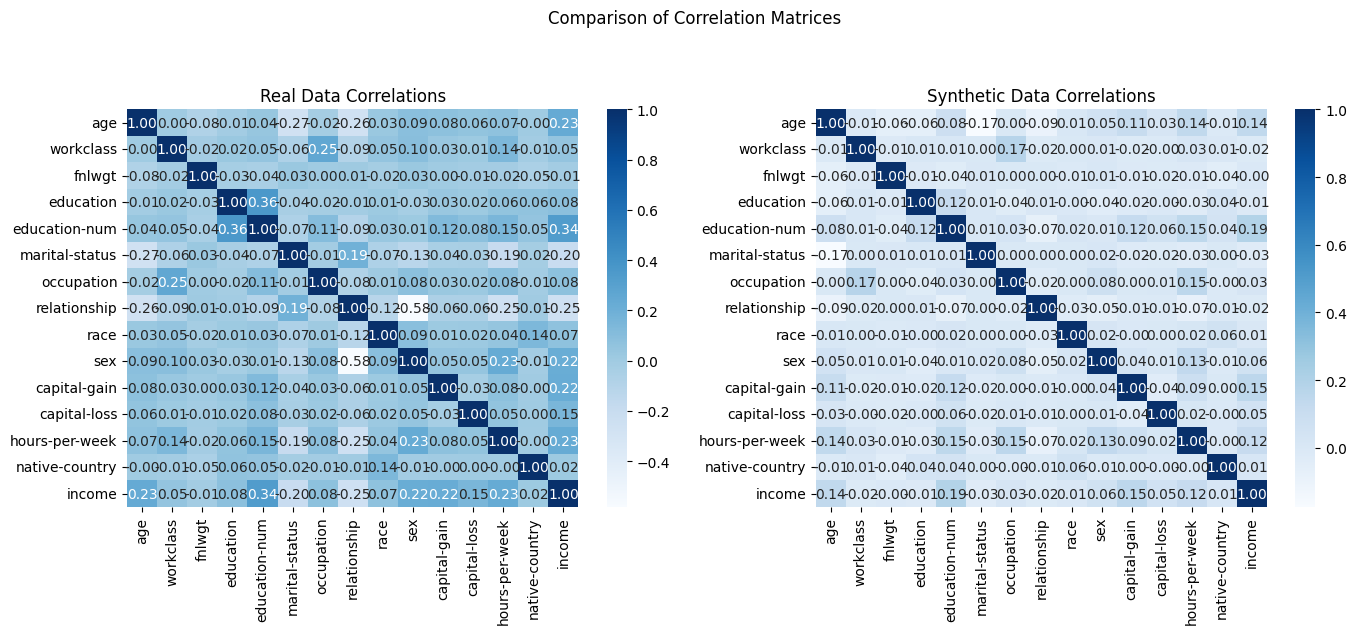

In [ ]:
# Plot correlation matrices
plt.figure(figsize=(14, 6))
plt.suptitle('Comparison of Correlation Matrices', y=1.05)

plt.subplot(1, 2, 1)
sns.heatmap(df_proc.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Real Data Correlations")

plt.subplot(1, 2, 2)
sns.heatmap(synthetic_data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Synthetic Data Correlations")

plt.tight_layout()
plt.show()

As can be seen above the real data shows meaningful statistical relationships (e.g., more education often leads to higher income)
Synthetic data fails to fully preserve these relationships — correlations are much weaker or absent.


### Save generated synthetic data

The created synthetic data can be saved and downloaded into the synthetic_adult_income.csv file.


In [ ]:
# Decode categorical variables back to original labels
for col in categorical_cols:
    synthetic_data[col] = label_encoders[col].inverse_transform(synthetic_data[col].round().astype(int))

# Save to CSV
synthetic_data.to_csv("synthetic_adult_income.csv", index=False)

## Quality Evaluation

In [ ]:
# Generate a quality report (convert metadata to dict)
report = QualityReport()
report.generate(
    real_data=df_proc,
    synthetic_data=synthetic_data,
    metadata=metadata_dict  # Use the dictionary here
)

# Print the overall score
print(f"Overall Quality Score: {report.get_score():.2f}")

# Visualize column distributions
report.get_visualization(property_name='Column Shapes')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 15/15 [00:00<00:00, 100.35it/s]|
Column Shapes Score: 82.21%

(2/2) Evaluating Column Pair Trends: |██████████| 105/105 [00:00<00:00, 147.43it/s]|
Column Pair Trends Score: 80.63%

Overall Score (Average): 81.42%

Overall Quality Score: 0.81


### Distribution

- *Column Shapes Score*: measures how similar the distribution of each individual column is between the real and synthetic datasets.

- *Column Pair Trends Score*: checks how well the relationships between pairs of columns (e.g., correlation between education-num and income) are preserved in the synthetic data

- Insights from the bar chart:

 - capital-gain has very low similarity (~0.1), meaning your model struggled to generate realistic values for it
  - sex, race, marital-status, workclass, etc. are almost perfect (~1.0), showing excellent synthetic quality for these categorical columns

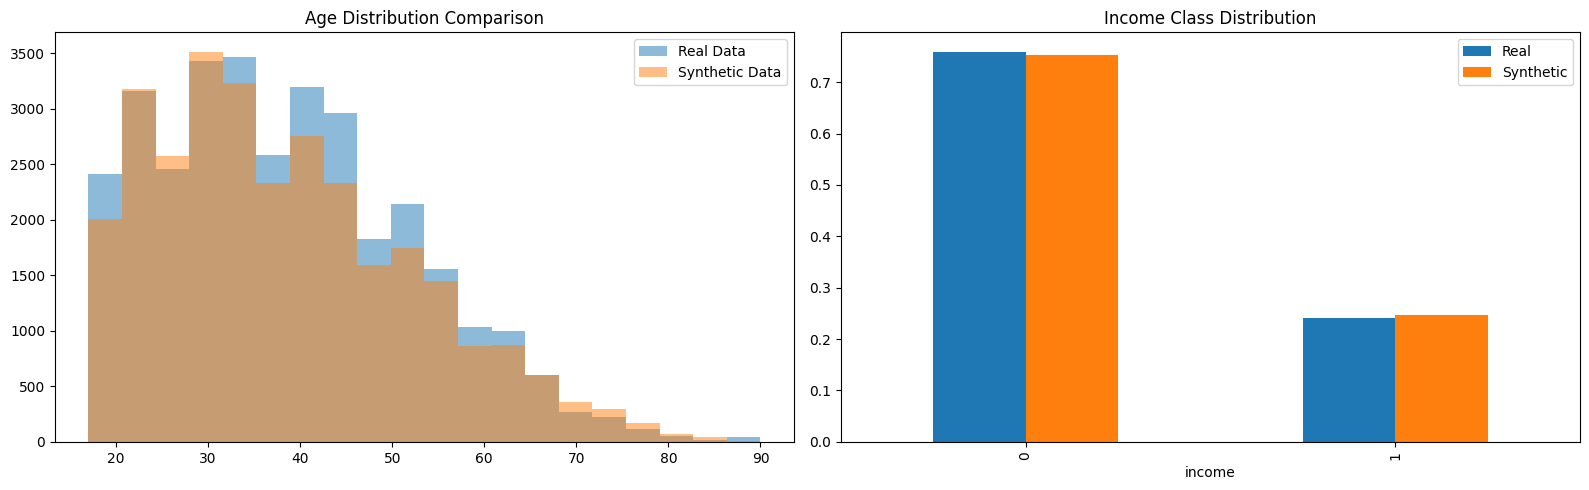

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Age Distribution
axes[0].hist(df_proc["age"], alpha=0.5, label="Real Data", bins=20)
axes[0].hist(synthetic_data["age"], alpha=0.5, label="Synthetic Data", bins=20)
axes[0].set_title("Age Distribution Comparison")
axes[0].legend()

# Income Distribution
income_real = df_proc["income"].value_counts(normalize=True)
income_synth = synthetic_data["income"].value_counts(normalize=True)
pd.DataFrame({"Real": income_real, "Synthetic": income_synth}).plot(kind="bar", ax=axes[1])  # Use ax=axes[1]
axes[1].set_title("Income Class Distribution")

plt.tight_layout()
plt.show()

As can be seen from the two plots, the distribution of the real vs the synthetic data is really similar in both of the case of Age and Income columns.

## Similarity

### Cosine similarity

Cosine similarity is a metric used to measure the similarity between two vectors. It quantifies the angle between these vectors in a multi-dimensional space, therefore it can determine how much two data points are alike based on their features or characteristics.

**Formula:**

*Cosine Similarity = (A · B) / (||A|| ||B||)*

In case of synthetic data generation it can be used to compare the overall feature vectors of real and synthetic data points. This could help assess how similar the synthetic data is to the real data in terms of its overall characteristics.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Numeric columns only
real_numeric = df_proc.select_dtypes(include='number')
synthetic_numeric = synthetic_data.select_dtypes(include='number')

# Compute cosine similarity
cos_sim_matrix = cosine_similarity(real_numeric, synthetic_numeric)

# Find maximum similarity of each real record to any synthetic
max_similarities = cos_sim_matrix.max(axis=1)
mean_max_similarity = max_similarities.mean()

print(f"Mean of max cosine similarity (Real to Synthetic): {mean_max_similarity:.3f}")


Mean of max cosine similarity (Real to Synthetic): 1.000


### KS Score

The **Kolmogorov–Smirnov (K-S) Complement Score** is also a distribution similarity measure, it measures how similar two numerical distributions are:

In [ ]:
# Compare distributions for a numerical column 'age'
ks_score = KSComplement.compute(
    df_proc['age'],
    synthetic_data['age']
)
print(f"KS Test Score : {ks_score:.2f}")

KS Test Score : 0.97


### Distance to Closest Record (DCR)

This tells us how close each synthetic record is to its nearest real record, beacuse if synthetic data is too similar, it may leak private information.

DCR is usually computed as the Euclidean distance between each synthetic record and the closest real record. A higher value of DCR means greater distance, i.e., synthetic records are not too similar to any real record, which is good for privacy.

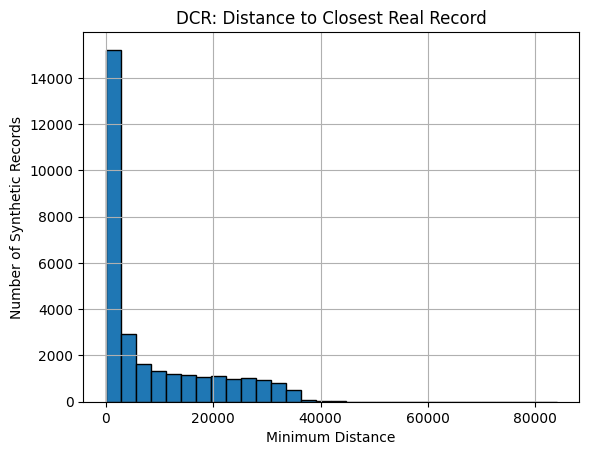

Average DCR: 8399.827


In [ ]:
from sklearn.metrics import pairwise_distances

# Ensure both datasets are numeric
real_numeric = df_proc.select_dtypes(include='number')
synthetic_numeric = synthetic_data.select_dtypes(include='number')

# Compute pairwise distances and get the minimum for each synthetic record
distances = pairwise_distances(synthetic_numeric, real_numeric)
min_distances = distances.min(axis=1)

# Plot distribution
plt.hist(min_distances, bins=30, edgecolor='k')
plt.title("DCR: Distance to Closest Real Record")
plt.xlabel("Minimum Distance")
plt.ylabel("Number of Synthetic Records")
plt.grid(True)
plt.show()

print(f"Average DCR: {min_distances.mean():.3f}")

## Privacy

### K-Anonymity (Custom Approximation)

K-anonymity ensures that each individual in a dataset cannot be distinguished from at least k-1 other individuals with respect to the quasi-identifiers in the dataset. This is done through generalisation, suppression and sometimes top- and bottom-coding. Applying k-anonymity makes it more difficult for an attacker to re-identify specific individuals in the dataset.

In [ ]:
qi_columns = ['age', 'education', 'race', 'sex']
qi_df = df_proc[qi_columns]

# Count frequency of each quasi-identifier combination
freqs = qi_df.value_counts()
k_anonymity = freqs.min()

print(f"Estimated k-Anonymity: {k_anonymity}")


Estimated k-Anonymity: 1


### L-Diversity (Custom Approximation)

L-diversity is an extension to k-anonymity that ensures that there is sufficient variation in a sensitive attribute. This is important, because if all individuals in a (subset of a) dataset have the same value for the sensitive attribute, there is still a risk of inference.

In [ ]:
sensitive_attr = 'income'
grouped = df_proc.groupby(qi_columns)[sensitive_attr].nunique()

l_diversity = grouped.min()
print(f"Estimated l-Diversity: {l_diversity}")


Estimated l-Diversity: 1


### The DisclosureProtection
This metric measures the risk associated with disclosing the synthetic data, it is a useful measurement if we want to know whether synthetic data is leaking patterns that pertain to sensitive information.
For example  if an attacker has prior knowledge about certain attributes (e.g. a  person's age and gender) and they are given access to the full synthetic data, would they be able to make better guesses about what they don't know (e.g. that person's income)?


In [ ]:
from sdmetrics.single_table import DisclosureProtection

score = DisclosureProtection.compute(
    real_data=df_proc,
    synthetic_data=synthetic_data,
    known_column_names=['age', 'sex'],
    sensitive_column_names=['income']
)

print(f"Disclosure Risk Score : {score:.2f}")

Disclosure Risk Score : 0.71


Checking for exact duplicates within the synthetic data:

In [ ]:
# Check if synthetic rows duplicate real rows
duplicates = synthetic_data.merge(df_proc, how='inner')
print(f"Exact duplicates: {len(duplicates)} rows")

Exact duplicates: 0 rows


Checking how well does the synthetic data perform besides the real data while doing a Random Foreest Classification:

In [ ]:
# Prepare data (example 'income' is the target)
X_real = df_proc.drop('income', axis=1)
y_real = df_proc['income']
X_synth = synthetic_data.drop('income', axis=1)
y_synth = synthetic_data['income']

# Train on synthetic data, test on real data
model = RandomForestClassifier()
model.fit(X_synth, y_synth)
y_pred = model.predict(X_real)

# Evaluate
accuracy = accuracy_score(y_real, y_pred)
print(f"Model Accuracy on Real Data: {accuracy:.2f}")

Model Accuracy on Real Data: 0.76


In [ ]:
diagnostic_report = DiagnosticReport()
diagnostic_report.generate(df_proc, synthetic_data, metadata=metadata_dict)

# Check for common issues (e.g., overfitting)
print(diagnostic_report.get_properties())

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 15/15 [00:00<00:00, 249.50it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 369.25it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

         Property  Score
0   Data Validity    1.0
1  Data Structure    1.0


The output from **DiagnosticReport** reffers to synthetic data's quality in terms of validity and structure, compared to the original data.

- Data Validity:	all values in synthetic dataset are valid, match the expected types, categories. No missing or out-of-bound values

- Data Structure: the structure of the synthetic data (e.g., column types, constraints, distributions of discrete vs. continuous values) exactly matches that of the original dataset


## Visualization

Evaluating the quality of the generated synthetic data by:
- creating a comprehensive quality report
- examinating the distributions of individual columns
- visualizing the relationships between pairs of columns

This can provide insights into the accuracy and fidelity of the synthetic data generation process.

### Principal Component Analysis (PCA) comparison between real and synthetic data


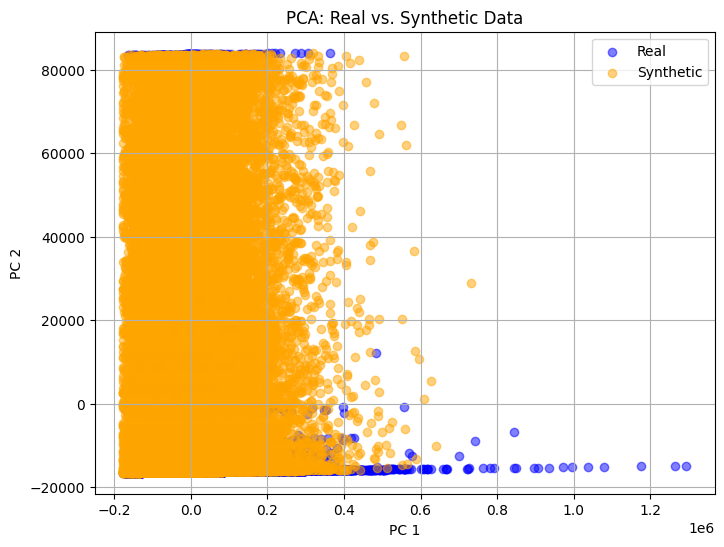

In [ ]:
# Combine real and synthetic data
combined = pd.concat([df_proc, synthetic_data])

# Convert to array
labels = np.array(['Real'] * len(df_proc) + ['Synthetic'] * len(synthetic_data))

# PCA on numeric columns
pca = PCA(n_components=2)
pca_results = pca.fit_transform(combined.select_dtypes(include=np.number))

# Plot with correct indexing
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[labels == 'Real', 0], pca_results[labels == 'Real', 1], alpha=0.5, label='Real', c='blue')
plt.scatter(pca_results[labels == 'Synthetic', 0], pca_results[labels == 'Synthetic', 1], alpha=0.5, label='Synthetic', c='orange')
plt.legend()
plt.title("PCA: Real vs. Synthetic Data")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

The generated PCA plot captures how similar or different are the real vs the synthetic data. In this case:
- real data (blue) is concentrated and limited

- synthetic data (orange) on the other hand is spread widely along

This suggests the synthetic data may have greater variance or outliers.

### Data Quality Report

This report is made with a library called **SDMetrics**, this measures how well synthetic data replicates key statistical properties of the real dataset.



In [ ]:
report = QualityReport()
report.generate(df_proc, synthetic_data, metadata.to_dict())
report.get_details(property_name='Column Shapes')
report.get_visualization(property_name='Column Pair Trends')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 15/15 [00:00<00:00, 97.45it/s]|
Column Shapes Score: 82.21%

(2/2) Evaluating Column Pair Trends: |██████████| 105/105 [00:00<00:00, 147.74it/s]|
Column Pair Trends Score: 80.63%

Overall Score (Average): 81.42%



From the results of the Quality Report the followings can be determined:

- **Column Shapes Score**: a measure of how well each column in the synthetic data comes close to representing the real data distribution - **82.21%**

- **Column Pair Trends Score**: a measure of how well relationships (correlations or dependencies) between pairs of columns are preserved - **80.63%**

- the first heatmap shows the extent to which pair-wise relationships (e.g. correlation or co-distribution) among features are preserved:

  - for example education-num vs age is experiencing good similarity (shown with light green color)

  - but income is a reddish column, so its interaction with other features is not well preserved

- the bottom two heatmaps show how similar are the correlation matrices of the two datasets


So from these results we can tell that the generated synthetic data performs moderately well in preserving individual column distributions and inter-column relationships.

Income could likely benefit from tuning — both marginal distribution and interaction with other columns.

The overall score of 80% is likely sufficient in most applications, but use-case context matters. For instance if our goal of data generation is privacy focused only a small amount of deviation is acceptable. In turn, if our object is utility focused (e.g. model training) an increased resemblance to real data is better.

In [ ]:
# Export the requirements into the requirements.txt file
!pip freeze > requirements.txt

## Limitations

- The Gaussian Copula method assumes variables have Gaussian distributions, which might not always be true
- Complex relationships between variables might not be perfectly preserved
- The quality of synthetic data depends on the quality and quantity of the original data

## Conclusion

With this project we generated synthetic data using statistical method Gaussian Copula. The approach balances data utility with privacy considerations, making it valuable for various cybersecurity applications where real data might be sensitive or limited, but definitly has it's limitations.